In [1]:
import datajoint as dj
import numpy as np
import matplotlib.pyplot as plt
from imagesc import imagesc
import pandas as pd

import retinotopic_mapping 
import retinotopic_mapping.tools.FileTools as ft
import retinotopic_mapping.RetinotopicMapping as rm

In [2]:
dj.config['database.host'] = '139.91.171.210:3306'
dj.config['database.user'] = 'eflab'

In [4]:
# Access pipeline
map = dj.create_virtual_module('map.py', 'pipeline_map')

Please enter DataJoint password:  ········


Connecting eflab@139.91.171.210:3306


In [5]:
map.OptImageBar()

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,axis the direction of bar movement,amp amplitude of the fft phase spectrum,ang angle of the fft phase spectrum,vessels,selected,pxpitch pixel pitch of the map (microns per pixel)
9254,1,4,horizontal,=BLOB=,=BLOB=,=BLOB=,1,7.421875
9254,1,5,vertical,=BLOB=,=BLOB=,=BLOB=,1,7.421875
9329,1,4,horizontal,=BLOB=,=BLOB=,=BLOB=,1,7.421875
9329,1,5,vertical,=BLOB=,=BLOB=,=BLOB=,0,7.421875
9329,1,6,horizontal,=BLOB=,=BLOB=,=BLOB=,0,7.421875
9329,2,5,horizontal,=BLOB=,=BLOB=,=BLOB=,0,7.421875
9329,2,6,vertical,=BLOB=,=BLOB=,=BLOB=,0,7.421875
9508,1,5,horizontal,=BLOB=,=BLOB=,=BLOB=,1,7.421875
9508,1,6,vertical,=BLOB=,=BLOB=,=BLOB=,0,7.421875
9579,1,6,horizontal,=BLOB=,=BLOB=,=BLOB=,1,7.421875


In [8]:
map.RetMapScan()

animal_id id number,ret_idx retinotopy map index for each animal,session session index for the mouse,scan_idx number of TIFF stack file,axis the direction of bar movement
9254,1,1,4,horizontal
9254,1,1,5,vertical
9329,1,1,5,vertical
9329,1,1,6,horizontal
9508,1,1,5,horizontal
9508,1,1,6,vertical
9579,1,1,6,horizontal
9579,1,1,7,vertical
9580,1,2,5,horizontal
9580,1,2,6,vertical


In [21]:
map.RetMapScan() * map.OptImageBar()

animal_id id number,ret_idx retinotopy map index for each animal,session session index for the mouse,scan_idx number of TIFF stack file,axis the direction of bar movement,amp amplitude of the fft phase spectrum,ang angle of the fft phase spectrum,vessels,selected,pxpitch pixel pitch of the map (microns per pixel)
9254,1,1,4,horizontal,=BLOB=,=BLOB=,=BLOB=,1,7.421875
9254,1,1,5,vertical,=BLOB=,=BLOB=,=BLOB=,1,7.421875
9329,1,1,5,vertical,=BLOB=,=BLOB=,=BLOB=,0,7.421875
9329,1,1,6,horizontal,=BLOB=,=BLOB=,=BLOB=,0,7.421875
9508,1,1,5,horizontal,=BLOB=,=BLOB=,=BLOB=,1,7.421875
9508,1,1,6,vertical,=BLOB=,=BLOB=,=BLOB=,0,7.421875
9579,1,1,6,horizontal,=BLOB=,=BLOB=,=BLOB=,1,7.421875
9579,1,1,7,vertical,=BLOB=,=BLOB=,=BLOB=,0,7.421875
9580,1,2,5,horizontal,=BLOB=,=BLOB=,=BLOB=,0,7.421875
9580,1,2,6,vertical,=BLOB=,=BLOB=,=BLOB=,0,7.421875


In [18]:
query = pd.DataFrame(((map.RetMapScan() * map.OptImageBar()).fetch()))

In [23]:
query['animal_id'].unique()

array([ 9254,  9329,  9508,  9579,  9580, 10417, 10566, 10577, 10578,
       10712, 11448, 11450, 11736, 12197, 12689, 12815, 15426, 16079,
       16081, 16154, 16157, 16312, 16314, 16371, 16377, 18765, 21617])

In [25]:
query['animal_id'].value_counts()

16154    10
16314     9
16157     8
16371     6
16312     4
18765     4
16377     2
15426     2
12689     2
9508      2
12197     2
9254      2
10417     2
11448     2
11450     2
16079     2
10566     2
21617     2
10577     2
10578     2
11736     2
10712     2
9579      2
9580      2
9329      2
16081     2
12815     2
Name: animal_id, dtype: int64

In [61]:
hor_query = map.RetMapScan() * map.OptImageBar() & 'animal_id= 16081' & 'axis="horizontal"'
vert_query = map.RetMapScan() * map.OptImageBar() & 'animal_id= 16081' & 'axis="vertical"'

In [62]:
hor_ang = hor_query.fetch1('ang')
hpositiveInput = (hor_ang > 0)
hor_l = np.mod(hor_ang, 2*np.pi)
hor_l[(hor_l == 0) & hpositiveInput] = 2*np.pi
h_mn = np.percentile(hor_l, 1)
h_mx = np.percentile(hor_l, 99)
hor_l[hor_l>h_mx]=h_mx
hor_l[hor_l<h_mn]=h_mn

Text(0.5, 1.0, 'ang_after')

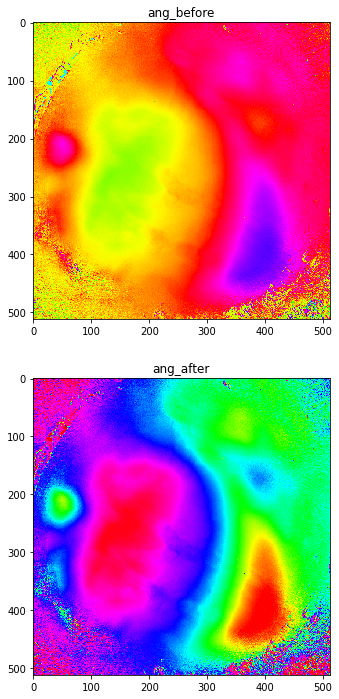

In [63]:
f = plt.figure(figsize=(15, 12))

plt.subplot(211)
plt.imshow(hor_ang, cmap='hsv', interpolation='nearest')
plt.title('ang_before')

plt.subplot(212)
plt.imshow(hor_l, cmap='hsv', interpolation='nearest')
plt.title('ang_after')

In [64]:
vert_ang = vert_query.fetch1('ang')
vpositiveInput = (vert_ang > 0)
vert_l = np.mod(vert_ang, 2*np.pi)
vert_l[(vert_l == 0) & vpositiveInput] = 2*np.pi
v_mn = np.percentile(vert_l, 1)
v_mx = np.percentile(vert_l, 99)
vert_l[vert_l>v_mx]=v_mx
vert_l[vert_l<v_mn]=v_mn

Text(0.5, 1.0, 'ang_after')

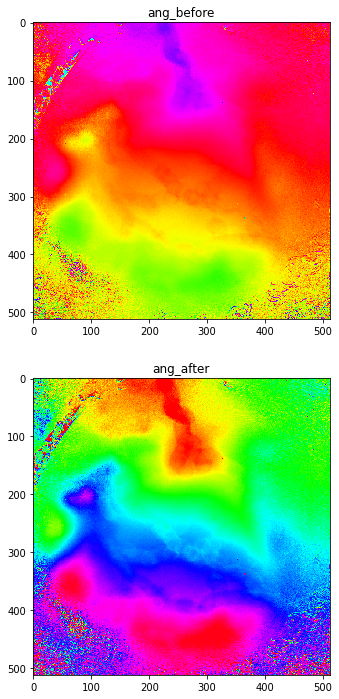

In [65]:
f = plt.figure(figsize=(15, 12))

plt.subplot(211)
plt.imshow(vert_ang, cmap='hsv', interpolation='nearest')
plt.title('ang_before')

plt.subplot(212)
plt.imshow(vert_l, cmap='hsv', interpolation='nearest')
plt.title('ang_after')

In [66]:
azi_amp, azi_ang, azi_vessels = hor_query.fetch1('amp', 'ang', 'vessels')
alt_amp, alt_ang, alt_vessels = vert_query.fetch1('amp', 'ang', 'vessels')


In [67]:
params = {
          'phaseMapFilterSigma': 0.5,   # FLOAT, default = 1.0, recommended range: [0.0, 2.0]
          'signMapFilterSigma': 8.,     # FLOAT, default = 9.0, recommended range: [0.6, 10.0]
          'signMapThr': 0.4,            # FLOAT, default = 0.35, recommended range: [0.2, 0.5], allowed range: [0, 1)
          'eccMapFilterSigma': 15.0,    # FLOAT, default = 10.0, do not change
          'splitLocalMinCutStep': 5.,   # FLOAT, default = 5.0, recommend range: [0.5, 15.0]
          'closeIter': 3,               # INT, default = 3, do not change
          'openIter': 3,                # INT, default = 3, do not change
          'dilationIter': 15,           # INT, default = 15, do not change
          'borderWidth': 1,             # INT, default = 1, do not change
          'smallPatchThr': 100,         # INT, default = 100, do not change
          'visualSpacePixelSize': 0.5,  # FLOAT, default = 0.5, do not change
          'visualSpaceCloseIter': 15,   # INT, default = 15, do not change
          'splitOverlapThr': 1.1,       # FLOAT, default = 1.1, recommend range: [1.0, 1.2], should be larger than 1.0
          'mergeOverlapThr': 0.1        # FLOAT, default = 0.1, recommend range: [0.0, 0.2], should be smaller than 1.0
          }

In [68]:
trial = rm.RetinotopicMappingTrial(altPosMap=vert_l,
                                   aziPosMap=hor_l,
                                   altPowerMap=alt_amp,
                                   aziPowerMap=azi_amp,
                                   vasculatureMap=azi_vessels,
                                   mouseID='10417',
                                   dateRecorded='160612',
                                   comments='This is an example.',
                                   params=params)

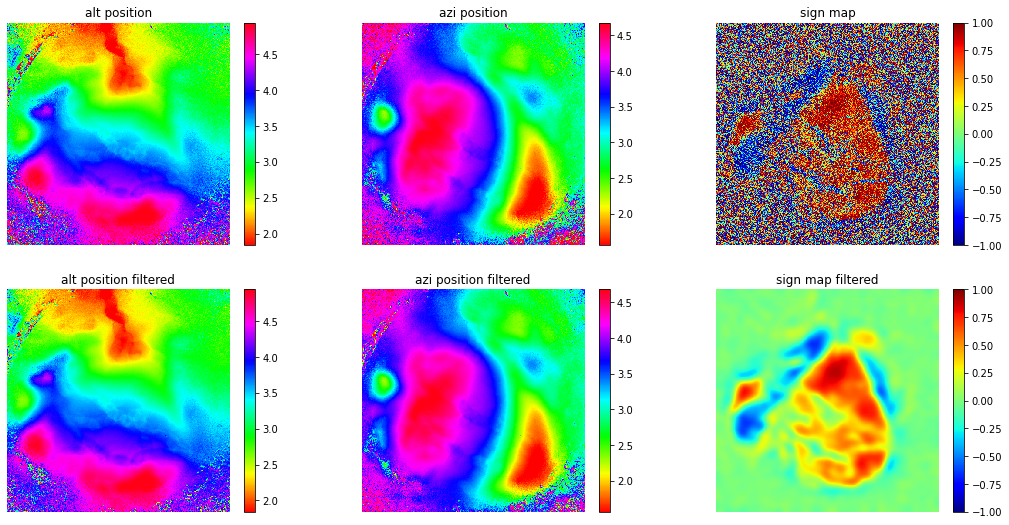

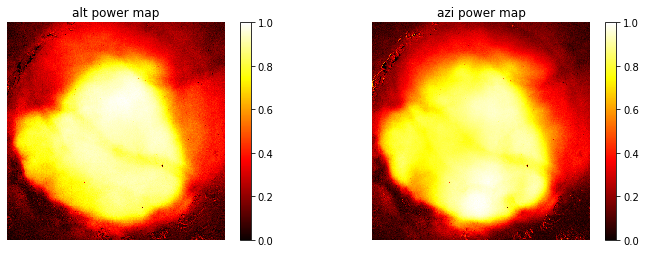

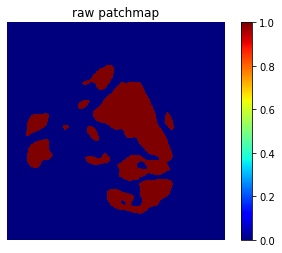

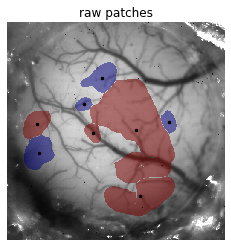

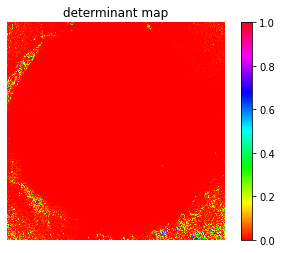

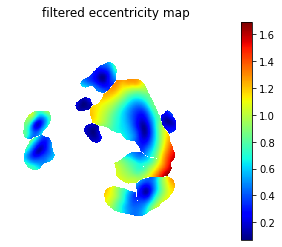

patch01AU=7.75 AS=6.117168 ratio=0.7893119935066469
patch02AU=3.0 AS=2.1935072 ratio=0.731169064839681
patch03AU=3.0 AS=1.4413028 ratio=0.48043425877888996
patch04AU=1.75 AS=0.74611235 ratio=0.42634991237095426
patch05AU=4.0 AS=2.4495068 ratio=0.6123766899108887
patch06AU=1.0 AS=0.30655745 ratio=0.30655744671821594
patch07AU=1.0 AS=0.14669693 ratio=0.14669692516326904
patch08AU=1.0 AS=0.11217764 ratio=0.11217764019966125


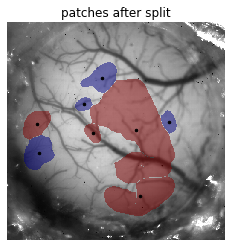

merge iteration: 1


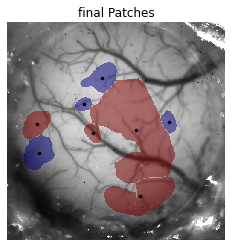

In [69]:
trial.processTrial(isPlot=True)

In [70]:
# default values
paramsd = {
          'phaseMapFilterSigma': 1, 
          'signMapFilterSigma': 9,
          'signMapThr': 0.35,
          'eccMapFilterSigma': 10.0,
          'splitLocalMinCutStep': 5.,
          'closeIter': 3,
          'openIter': 3,
          'dilationIter': 15,
          'borderWidth': 1,
          'smallPatchThr': 100,
          'visualSpacePixelSize': 0.5,
          'visualSpaceCloseIter': 15,
          'splitOverlapThr': 1.1,
          'mergeOverlapThr': 0.1
          }

In [71]:
triald = rm.RetinotopicMappingTrial(altPosMap=vert_l,
                                   aziPosMap=hor_l,
                                   altPowerMap=alt_amp,
                                   aziPowerMap=azi_amp,
                                   vasculatureMap=azi_vessels,
                                   mouseID='10417',
                                   dateRecorded='160612',
                                   comments='This is an example.',
                                   params=paramsd)

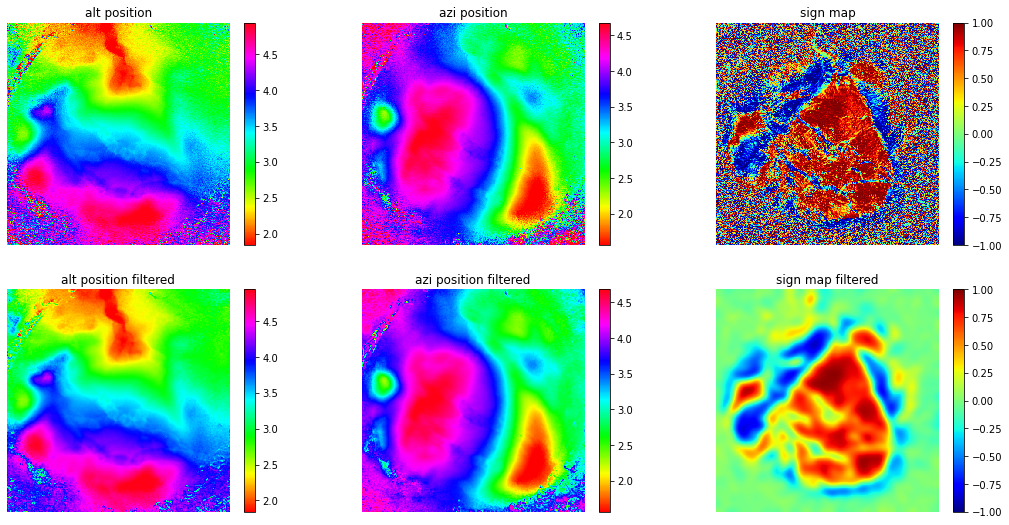

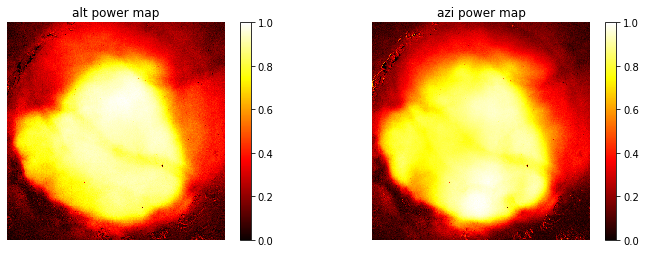

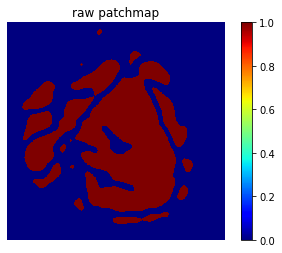

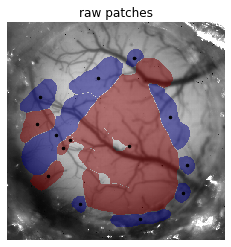

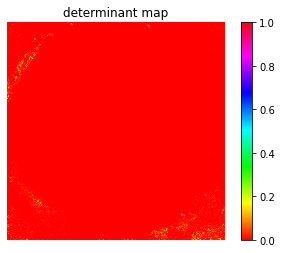

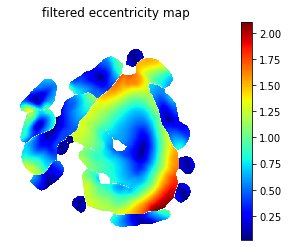

patch01AU=10.0 AS=8.189098 ratio=0.8189098358154296
patch02AU=4.0 AS=1.9268509 ratio=0.4817127287387848
patch03AU=2.25 AS=0.8816962 ratio=0.391864988538954
patch04AU=3.0 AS=0.8860565 ratio=0.29535216093063354
patch05AU=4.0 AS=2.2770822 ratio=0.5692705512046814
patch06AU=4.0 AS=2.3662434 ratio=0.5915608406066895
patch07AU=1.5 AS=0.66053784 ratio=0.44035855929056805
patch08AU=1.0 AS=0.31914198 ratio=0.3191419839859009
patch09AU=0.5 AS=0.10510512 ratio=0.21021023392677307
patch10AU=0.75 AS=0.120984614 ratio=0.16131281852722168
patch11AU=0.75 AS=0.08386381 ratio=0.11181841293970744
patch12AU=0.75 AS=0.070907004 ratio=0.09454267223676045
patch13AU=0.25 AS=0.037253357 ratio=0.1490134298801422
patch14AU=0.25 AS=0.0053453483 ratio=0.02138139307498932


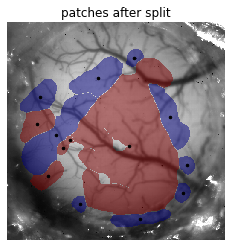

merge iteration: 1


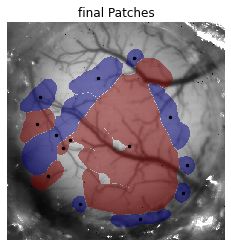

In [72]:
triald.processTrial(isPlot=True)